# MID TERM EXAMINATION

#### CS 513 B
#### Shubhankar Deol
#### 20013072

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('BP.csv')

In [40]:
df.rename({'Somker':'Smoker'}, axis=1, inplace=True)
df.head(100)

,Smoker,Gender,Age,Height,Weight,BP_Status
0,1- Non-smoker,Female,29,62.50,140,Normal
1,1- Non-smoker,Female,41,59.75,194,High
2,3- Moderate,Female,57,62.25,132,High
3,1- Non-smoker,Female,39,65.75,158,Normal
4,1- Non-smoker,Female,58,61.75,131,High
...,...,...,...,...,...,...
95,5- Very Heavy,Female,35,64.50,124,Normal
96,2- Light,Female,44,61.50,118,Normal
97,3- Moderate,Male,52,70.00,122,Normal
98,1- Non-smoker,Male,36,72.75,169,Normal


In [41]:
print(df['Smoker'].unique())
print(df['BP_Status'].unique())

['1- Non-smoker' '3- Moderate' '2- Light' '5- Very Heavy' '4- Heavy']
['Normal' 'High']


In [42]:
smoking_map = {
    '1- Non-smoker': 1,
    '2- Light': 2,
    '3- Moderate': 3,
    '4- Heavy': 4,
    '5- Very Heavy': 5
}

BP_map = {
    'Normal' : 0,
    'High' : 1
}

In [43]:
df['Smoker'] = df['Smoker'].map(smoking_map)
#df['BP_Status'] = df['BP_Status'].map(BP_map)

In [44]:
df.head()

,Smoker,Gender,Age,Height,Weight,BP_Status
0,1,Female,29,62.50,140,Normal
1,1,Female,41,59.75,194,High
2,3,Female,57,62.25,132,High
3,1,Female,39,65.75,158,Normal
4,1,Female,58,61.75,131,High


### Question 4

In [45]:
import matplotlib.pyplot as plt

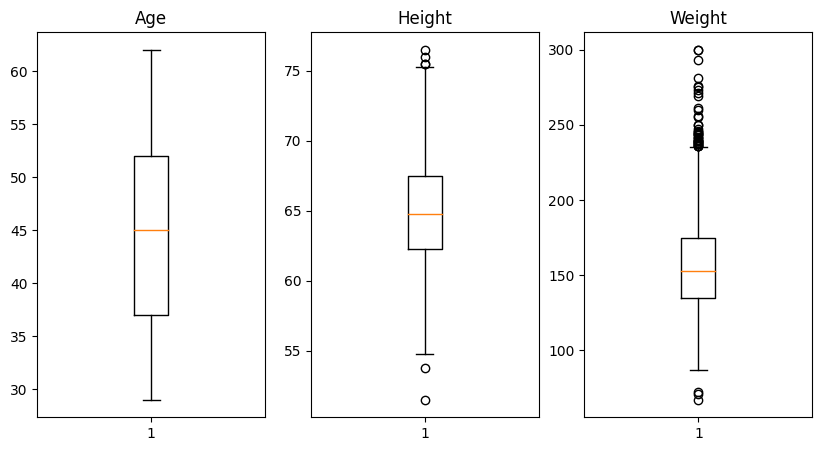

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.boxplot(df['Age'])
plt.title('Age')
plt.subplot(1,3,2)
plt.boxplot(df['Height'])
plt.title('Height')
plt.subplot(1,3,3)
plt.boxplot(df['Weight'])
plt.title('Weight')
plt.show()

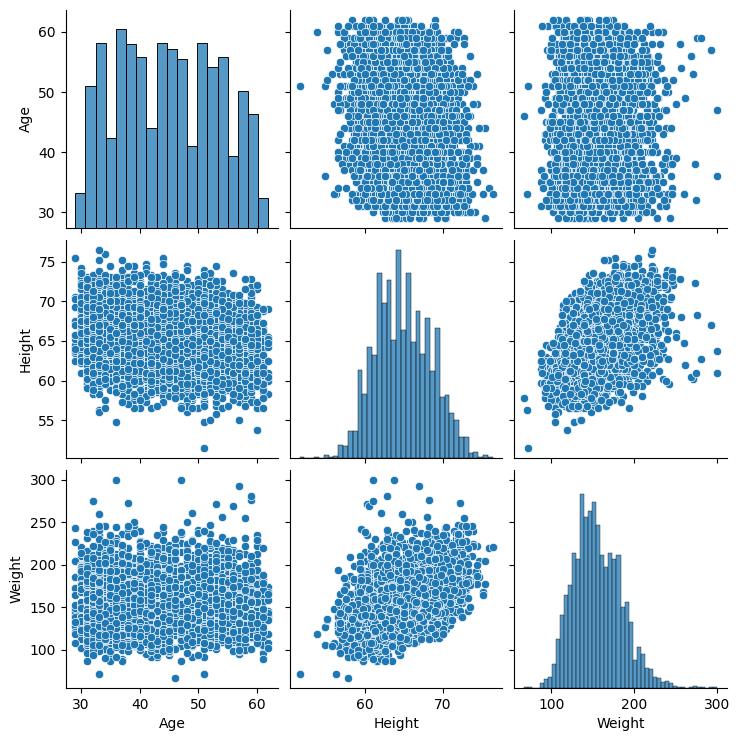

In [56]:
import seaborn as sns

sns.pairplot(df[['Age','Height','Weight']])
plt.show()

### Question 5

In [57]:
from sklearn.model_selection import train_test_split

X = df[['Smoker','Age','Height','Weight']]
y = df['BP_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print("Acuracy: ", accuracy_score(y_test,y_pred))
rep = classification_report(y_test,y_pred)
print("F1 Score: ", f1_score(y_test,y_pred, pos_label="High"))
print("Recall Score: ", recall_score(y_test,y_pred, pos_label="High"))

Acuracy:  0.5420136260408781
F1 Score:  0.5515196441808747
Recall Score:  0.5486725663716814


### Question 6

In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("Acuracy: ", accuracy_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred, pos_label="High"))
print("Recall Score: ", recall_score(y_test,y_pred, pos_label="High"))

Acuracy:  0.627554882664648
F1 Score:  0.6434782608695652
Recall Score:  0.6548672566371682


### Question 7

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Acuracy: ", accuracy_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred, pos_label="High"))
print("Recall Score: ", recall_score(y_test,y_pred, pos_label="High"))

Acuracy:  0.5919757759273278
F1 Score:  0.607428987618354
Recall Score:  0.6150442477876106
